In [1]:
#Importing useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Uploading data set into a data frame and print out data set
df = pd.read_csv("churn_clean.csv")

In [3]:
#Drop unimportant columns
df = df.drop(columns=['Job','CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
        'Population', 'Area', 'TimeZone', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [4]:
#Check columns for missing values
df.isnull().sum()

Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

In [5]:
#Shows all columns and their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Marital               10000 non-null  object 
 4   Gender                10000 non-null  object 
 5   Churn                 10000 non-null  object 
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Techie                10000 non-null  object 
 11  Contract              10000 non-null  object 
 12  Port_modem            10000 non-null  object 
 13  Tablet                10000 non-null  object 
 14  InternetService       10000 non-null  object 
 15  Phone               

In [6]:
#Prints summary statistics for all columns
print(df.describe(include = 'all'))

          Children           Age         Income   Marital  Gender  Churn  \
count   10000.0000  10000.000000   10000.000000     10000   10000  10000   
unique         NaN           NaN            NaN         5       3      2   
top            NaN           NaN            NaN  Divorced  Female     No   
freq           NaN           NaN            NaN      2092    5025   7350   
mean        2.0877     53.078400   39806.926771       NaN     NaN    NaN   
std         2.1472     20.698882   28199.916702       NaN     NaN    NaN   
min         0.0000     18.000000     348.670000       NaN     NaN    NaN   
25%         0.0000     35.000000   19224.717500       NaN     NaN    NaN   
50%         1.0000     53.000000   33170.605000       NaN     NaN    NaN   
75%         3.0000     71.000000   53246.170000       NaN     NaN    NaN   
max        10.0000     89.000000  258900.700000       NaN     NaN    NaN   

        Outage_sec_perweek         Email      Contacts  Yearly_equip_failure  \
count  

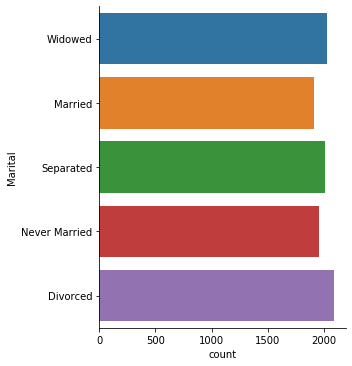

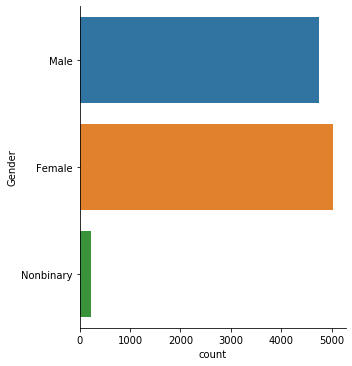

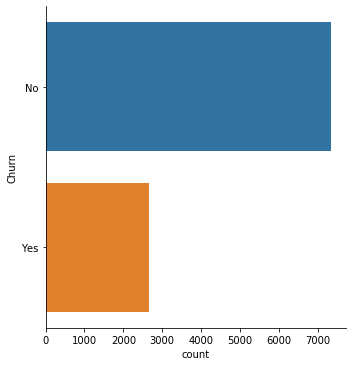

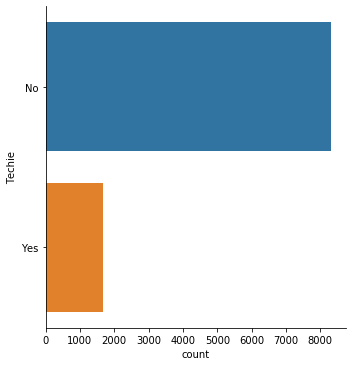

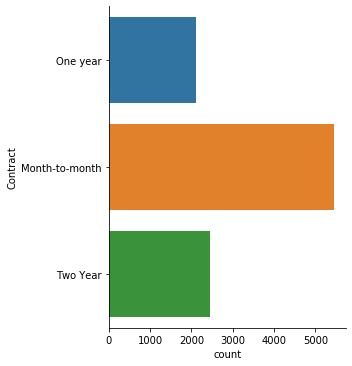

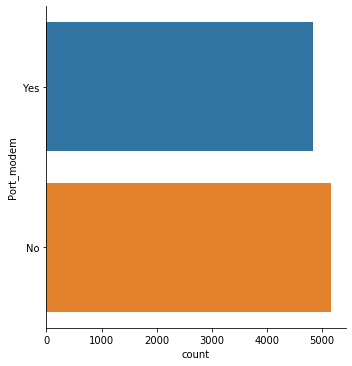

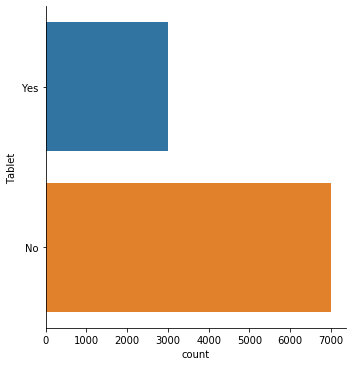

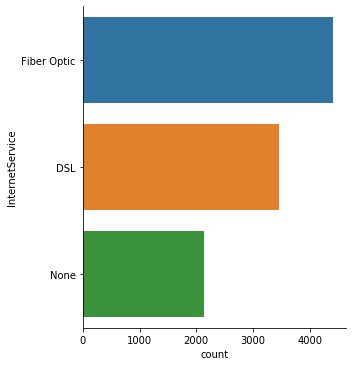

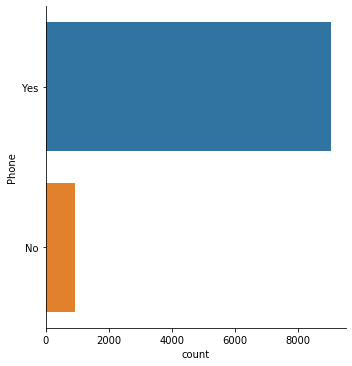

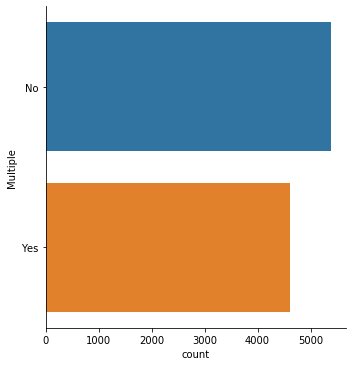

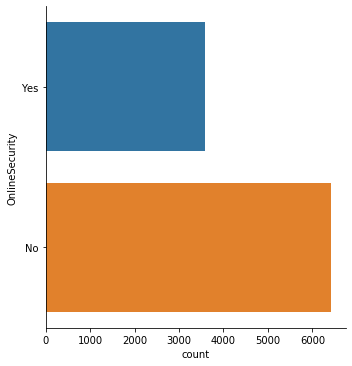

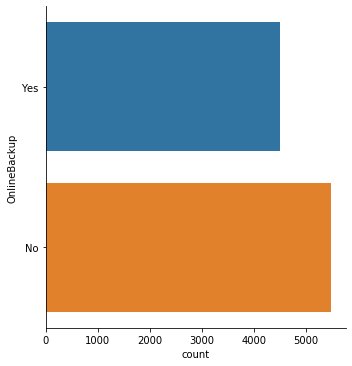

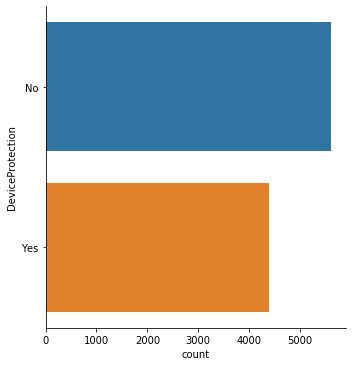

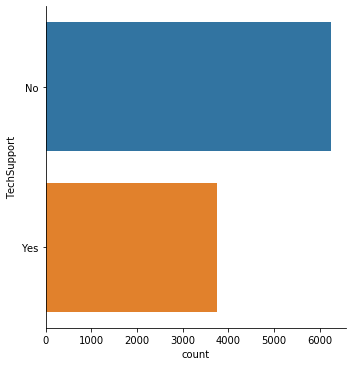

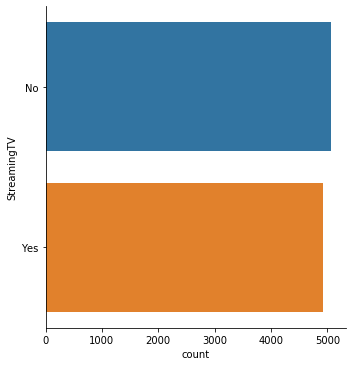

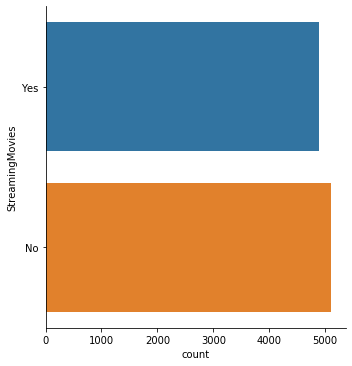

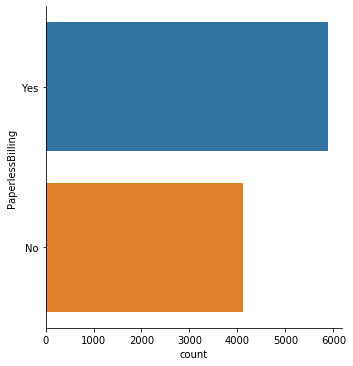

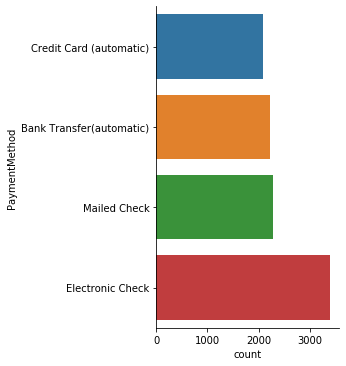

In [7]:
#Univariate graphs for categorical variables
sns.catplot(y="Marital", kind="count", data=df)
sns.catplot(y="Gender", kind="count", data=df)
sns.catplot(y="Churn", kind="count", data=df)
sns.catplot(y="Techie", kind="count", data=df)
sns.catplot(y="Contract", kind="count", data=df)
sns.catplot(y="Port_modem", kind="count", data=df)
sns.catplot(y="Tablet", kind="count", data=df)
sns.catplot(y="InternetService", kind="count", data=df)
sns.catplot(y="Phone", kind="count", data=df)
sns.catplot(y="Multiple", kind="count", data=df)
sns.catplot(y="OnlineSecurity", kind="count", data=df)
sns.catplot(y="OnlineBackup", kind="count", data=df)
sns.catplot(y="DeviceProtection", kind="count", data=df)
sns.catplot(y="TechSupport", kind="count", data=df)
sns.catplot(y="StreamingTV", kind="count", data=df)
sns.catplot(y="StreamingMovies", kind="count", data=df)
sns.catplot(y="PaperlessBilling", kind="count", data=df)
sns.catplot(y="PaymentMethod", kind="count", data=df)

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

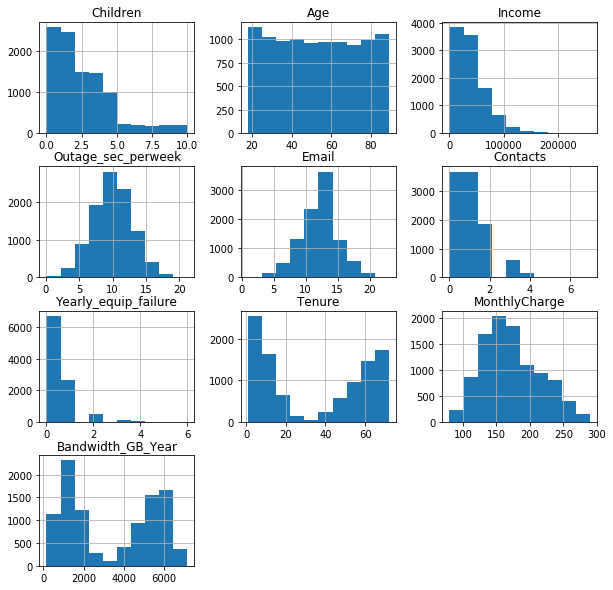

In [8]:
#Univariate graphs for Continuous variables
df.hist(figsize=(10,10))
df['Bandwidth_GB_Year'].describe()


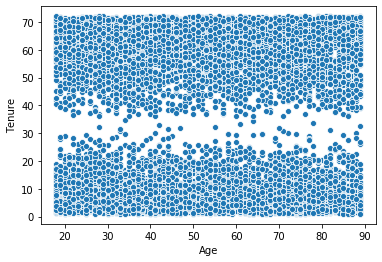

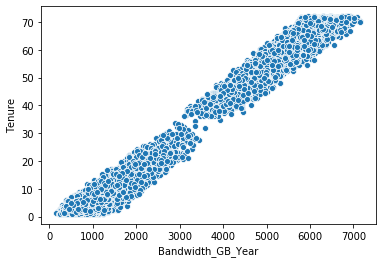

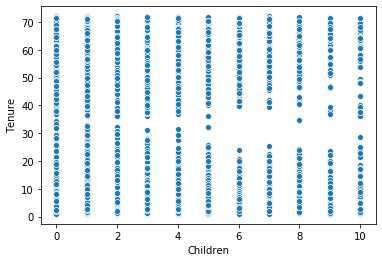

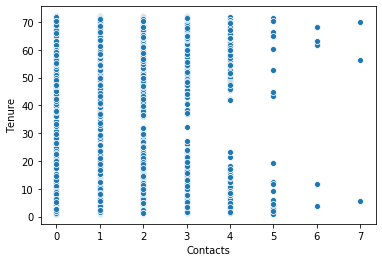

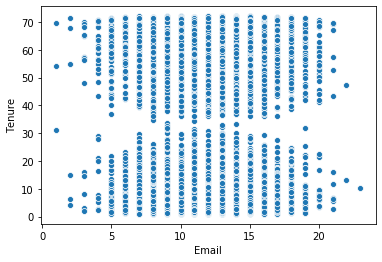

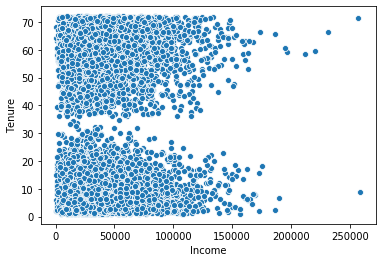

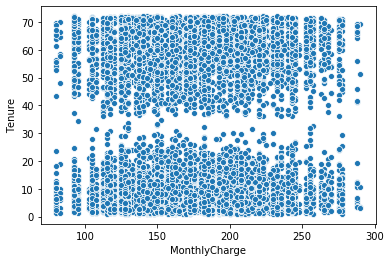

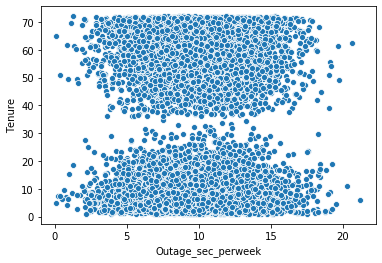

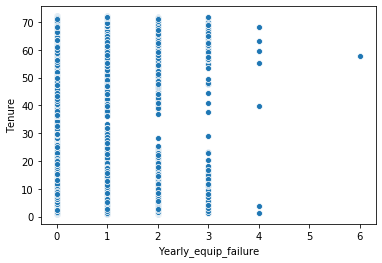

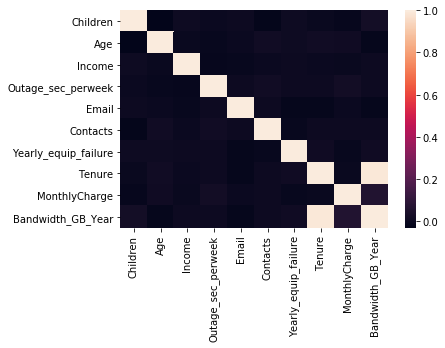

In [9]:
#Bivariate graphs for continuous variables
sns.scatterplot(x=df["Age"], y=df["Tenure"])
plt.show()
sns.scatterplot(x=df["Bandwidth_GB_Year"], y=df["Tenure"])
plt.show()
sns.scatterplot(x=df["Children"], y=df["Tenure"])
plt.show()
sns.scatterplot(x=df["Contacts"], y=df["Tenure"])
plt.show()
sns.scatterplot(x=df["Email"], y=df["Tenure"])
plt.show()
sns.scatterplot(x=df["Income"], y=df["Tenure"])
plt.show()
sns.scatterplot(x=df["MonthlyCharge"], y=df["Tenure"])
plt.show()
sns.scatterplot(x=df["Outage_sec_perweek"], y=df["Tenure"])
plt.show()
sns.scatterplot(x=df["Yearly_equip_failure"], y=df["Tenure"])
plt.show()
sns.heatmap(df.corr(), annot=False)
plt.show()

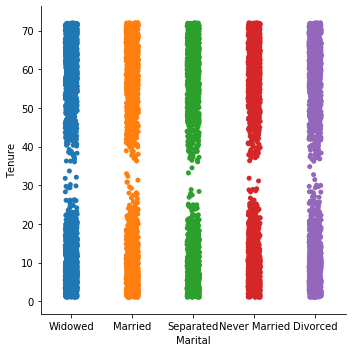

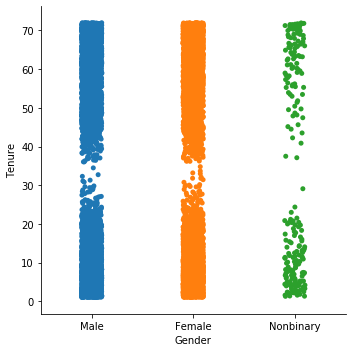

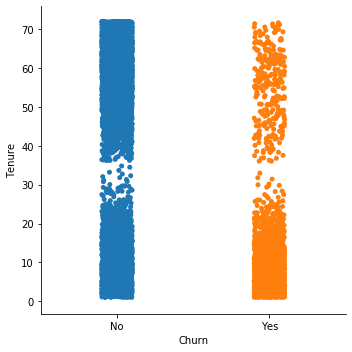

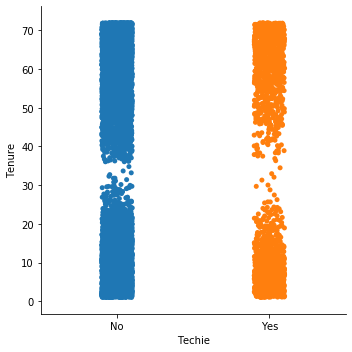

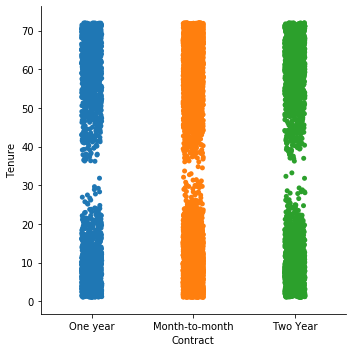

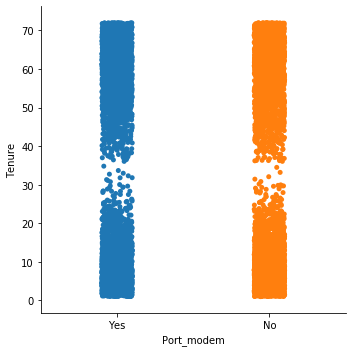

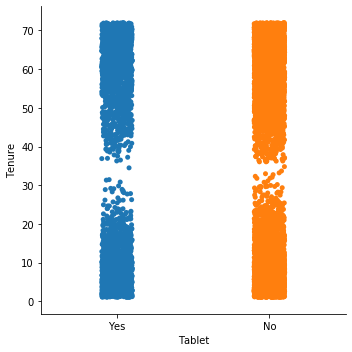

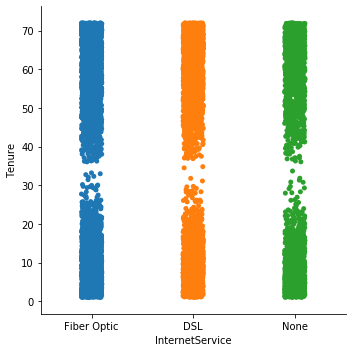

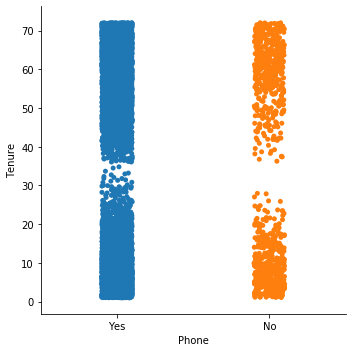

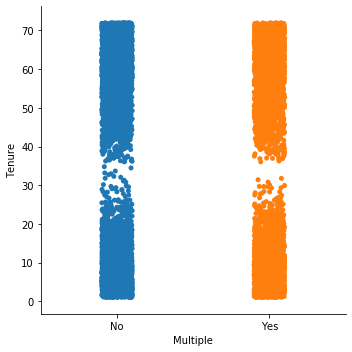

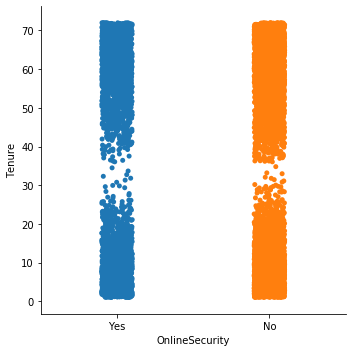

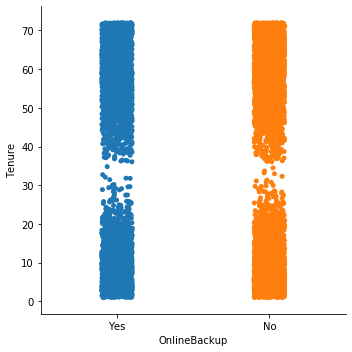

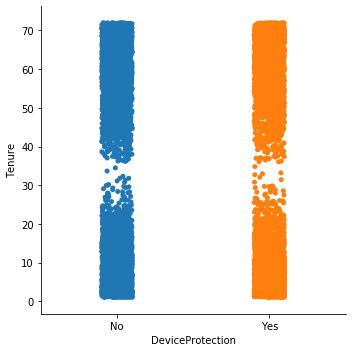

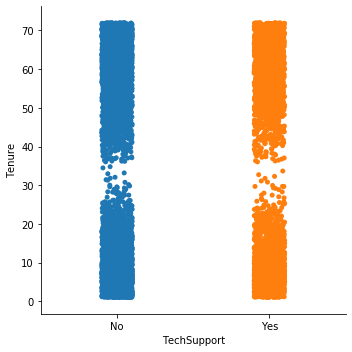

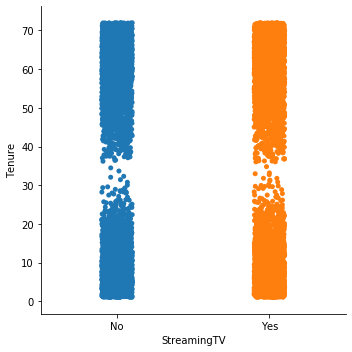

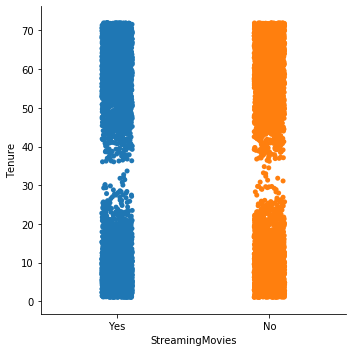

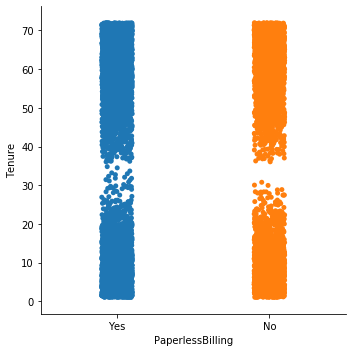

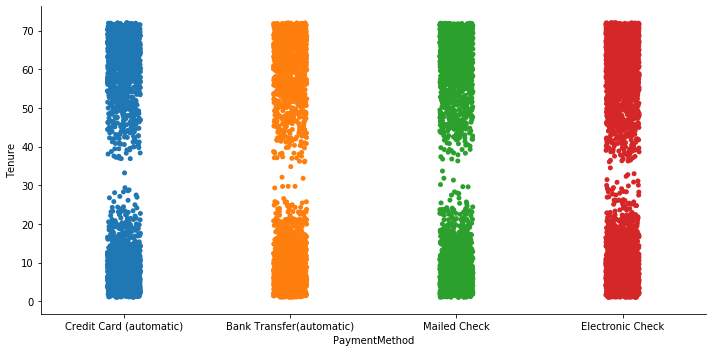

In [10]:
sns.catplot(x="Marital", y="Tenure", data=df)
sns.catplot(x="Gender", y="Tenure", data=df)
sns.catplot(x="Churn", y="Tenure", data=df)
sns.catplot(x="Techie", y="Tenure", data=df)
sns.catplot(x="Contract", y="Tenure", data=df)
sns.catplot(x="Port_modem", y="Tenure", data=df)
sns.catplot(x="Tablet", y="Tenure", data=df)
sns.catplot(x="InternetService", y="Tenure", data=df)
sns.catplot(x="Phone", y="Tenure", data=df)
sns.catplot(x="Multiple", y="Tenure", data=df)
sns.catplot(x="OnlineSecurity", y="Tenure", data=df)
sns.catplot(x="OnlineBackup", y="Tenure", data=df)
sns.catplot(x="DeviceProtection", y="Tenure", data=df)
sns.catplot(x="TechSupport", y="Tenure", data=df)
sns.catplot(x="StreamingTV", y="Tenure", data=df)
sns.catplot(x="StreamingMovies", y="Tenure", data=df)
sns.catplot(x="PaperlessBilling", y="Tenure", data=df)
sns.catplot(x="PaymentMethod", y="Tenure", data=df, aspect=2)

In [11]:
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [12]:
#Changing Marital values
df['Marital']=np.where(df['Marital'] == 'Widowed','No',df['Marital'])
df['Marital']=np.where(df['Marital'] == 'Separated','No',df['Marital'])
df['Marital']=np.where(df['Marital'] == 'Divorced','No',df['Marital'])
df['Marital']=np.where(df['Marital'] == 'Never Married','No',df['Marital'])
df['Marital']=np.where(df['Marital'] == 'Married','Yes',df['Marital'])

In [13]:
#Changing Contract values
df['Contract']=np.where(df['Contract'] == 'One year','Yearly',df['Contract'])
df['Contract']=np.where(df['Contract'] == 'Two Year','Yearly',df['Contract'])
df['Contract']=np.where(df['Contract'] == 'Month-to-month','Monthly',df['Contract'])

In [14]:
#Changing InternetService values
df['InternetService']=np.where(df['InternetService'] == 'DSL','Yes',df['InternetService'])
df['InternetService']=np.where(df['InternetService'] == 'Fiber Optic','Yes',df['InternetService'])
df['InternetService']=np.where(df['InternetService'] == 'None','No',df['InternetService'])

In [15]:
#Changing PaymentMethod values
df= df.rename(columns={"PaymentMethod": "AutoPayment"})
df['AutoPayment']=np.where(df['AutoPayment'] == 'Credit Card (automatic)','Yes',df['AutoPayment'])
df['AutoPayment']=np.where(df['AutoPayment'] == 'Bank Transfer(automatic)','Yes',df['AutoPayment'])
df['AutoPayment']=np.where(df['AutoPayment'] == 'Mailed Check','No',df['AutoPayment'])
df['AutoPayment']=np.where(df['AutoPayment'] == 'Electronic Check','No',df['AutoPayment'])


In [16]:
df = df.drop(columns= 'Bandwidth_GB_Year')

In [17]:
#Removing nonbinary columns, describing new dataframe and exporting to a new csv
nonbinary = df[df['Gender'] != 'Nonbinary']
print(nonbinary.describe(include = 'all'))
nonbinary.to_csv('PreparedChurn')

           Children          Age         Income Marital  Gender Churn  \
count   9769.000000  9769.000000    9769.000000    9769    9769  9769   
unique          NaN          NaN            NaN       2       2     2   
top             NaN          NaN            NaN      No  Female    No   
freq            NaN          NaN            NaN    7900    5025  7178   
mean       2.086908    53.139216   39779.609812     NaN     NaN   NaN   
std        2.151586    20.699125   28144.357118     NaN     NaN   NaN   
min        0.000000    18.000000     348.670000     NaN     NaN   NaN   
25%        0.000000    35.000000   19218.350000     NaN     NaN   NaN   
50%        1.000000    53.000000   33168.880000     NaN     NaN   NaN   
75%        3.000000    71.000000   53165.550000     NaN     NaN   NaN   
max       10.000000    89.000000  258900.700000     NaN     NaN   NaN   

        Outage_sec_perweek        Email     Contacts  Yearly_equip_failure  \
count          9769.000000  9769.000000  9769

In [18]:
#Create dummie variables and fit initial MLR model
df = nonbinary.drop(columns='Tenure')
cat= ['Marital', 'Gender', 'Techie', 'Contract', 'Churn' ,'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling', 'AutoPayment']
X = pd.get_dummies(df, columns=cat, drop_first=True)
y=nonbinary["Tenure"]
X = sm.add_constant(X)
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     167.0
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:21   Log-Likelihood:                -44049.
No. Observations:                9769   AIC:                         8.815e+04
Df Residuals:                    9742   BIC:                         8.835e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.3074      2.190     16.120      0.000      31.014      39.601
Children                -0.0273      0.104     -0.263      0.792      -0.231       0.176
Age                      0.0218      0.011      2.024      0.043       0.001       0.043
Income                3.512e-06   7.92e-06      0.443      0.657    -1.2e-05     1.9e-05
Outage_sec_perweek      -0.0135      0.075     -0.180      0.857      -0.160       0.133
Email                   -0.0733      0.074     -0.995      0.320      -0.218       0.071
Contacts                 0.2013      0.226      0.892      0.372      -0.241       0.643
Yearly_equip_failure     0.1880      0.351      0.535      0.593      -0.501       0.877
MonthlyCharge           -0.0132      0.018     -0.733      0.464      -0.048       0.022
Marital_Yes              0.0872      0.567      0.154      0.878      -1.024       1.198
Gender_Male              0.0989      0.446      0.222      0.825      -0.776       0.974
Techie_Yes               2.2048      0.597      3.691      0.000       1.034       3.376
Contract_Yearly         -8.3853      0.469    -17.875      0.000      -9.305      -7.466
Churn_Yes              -37.9588      0.579    -65.562      0.000     -39.094     -36.824
Port_modem_Yes           0.7064      0.446      1.584      0.113      -0.168       1.581
Tablet_Yes              -0.3183      0.487     -0.653      0.514      -1.273       0.637
InternetService_Yes      2.4770      0.695      3.564      0.000       1.114       3.839
Phone_Yes               -0.6847      0.766     -0.893      0.372      -2.187       0.818
Multiple_Yes             4.3457      0.739      5.880      0.000       2.897       5.794
OnlineSecurity_Yes      -0.2023      0.468     -0.432      0.666      -1.120       0.715
OnlineBackup_Yes         3.1064      0.605      5.136      0.000       1.921       4.292
DeviceProtection_Yes     0.3354      0.504      0.665      0.506      -0.653       1.324
TechSupport_Yes          0.8306      0.509      1.631      0.103      -0.168       1.829
StreamingTV_Yes          8.7209      0.885      9.855      0.000       6.986      10.456
StreamingMovies_Yes     10.2440      1.050      9.756      0.000       8.186      12.302
PaperlessBilling_Yes     0.3362      0.453      0.742      0.458      -0.552       1.224
AutoPayment_Yes         -0.8998      0.450     -1.998      0.046      -1.782      -0.017
==============================================================================
Omnibus:                     1388.520   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.987
Skew:                          -0.199   Prob(JB):                     4.61e-86
Kurtosis:                       2.102   Cond. No.                     5.24e+05
==================

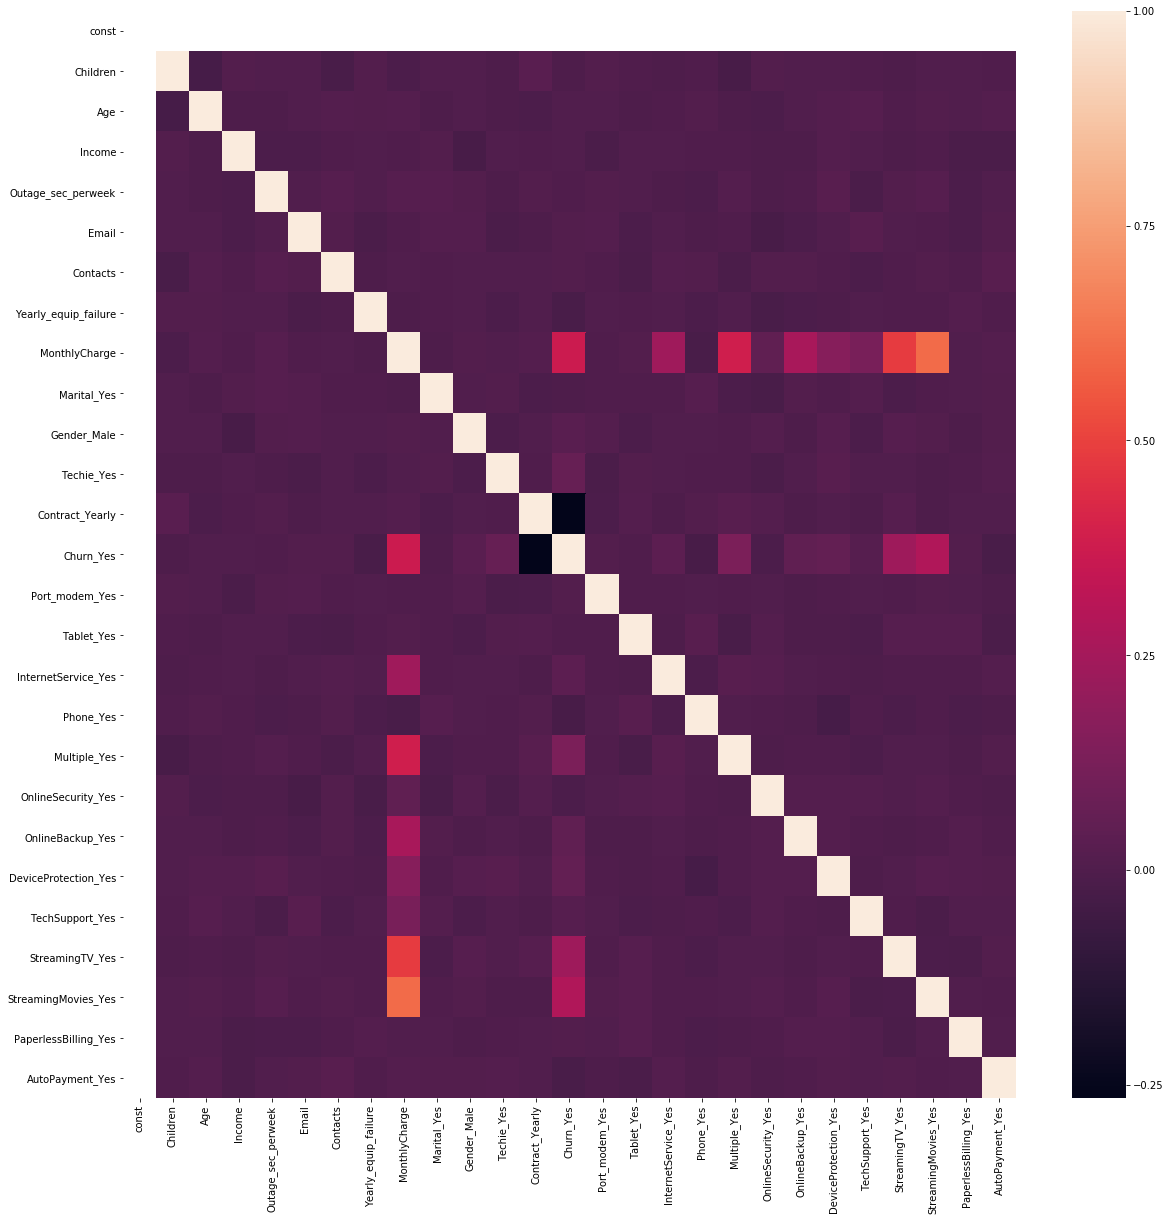

In [19]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(X.corr(), annot=False, ax=ax)
plt.show()

In [20]:
X = X.drop(columns='Marital_Yes')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     173.7
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:21   Log-Likelihood:                -44049.
No. Observations:                9769   AIC:                         8.815e+04
Df Residuals:                    9743   BIC:                         8.834e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.3194      2.189     16.136      0.000      31.029      39.610
Children                -0.0272      0.104     -0.263      0.793      -0.230       0.176
Age                      0.0218      0.011      2.023      0.043       0.001       0.043
Income                3.524e-06   7.92e-06      0.445      0.656    -1.2e-05     1.9e-05
Outage_sec_perweek      -0.0133      0.075     -0.178      0.859      -0.160       0.133
Email                   -0.0731      0.074     -0.993      0.321      -0.217       0.071
Contacts                 0.2013      0.226      0.892      0.372      -0.241       0.643
Yearly_equip_failure     0.1881      0.351      0.535      0.592      -0.501       0.877
MonthlyCharge           -0.0132      0.018     -0.734      0.463      -0.048       0.022
Gender_Male              0.0991      0.446      0.222      0.824      -0.776       0.974
Techie_Yes               2.2055      0.597      3.692      0.000       1.035       3.376
Contract_Yearly         -8.3863      0.469    -17.880      0.000      -9.306      -7.467
Churn_Yes              -37.9594      0.579    -65.567      0.000     -39.094     -36.825
Port_modem_Yes           0.7065      0.446      1.584      0.113      -0.168       1.581
Tablet_Yes              -0.3184      0.487     -0.653      0.513      -1.273       0.637
InternetService_Yes      2.4772      0.695      3.564      0.000       1.115       3.840
Phone_Yes               -0.6821      0.766     -0.890      0.373      -2.184       0.820
Multiple_Yes             4.3454      0.739      5.880      0.000       2.897       5.794
OnlineSecurity_Yes      -0.2036      0.468     -0.435      0.664      -1.121       0.714
OnlineBackup_Yes         3.1074      0.605      5.138      0.000       1.922       4.293
DeviceProtection_Yes     0.3356      0.504      0.666      0.506      -0.653       1.324
TechSupport_Yes          0.8317      0.509      1.633      0.102      -0.167       1.830
StreamingTV_Yes          8.7208      0.885      9.855      0.000       6.986      10.455
StreamingMovies_Yes     10.2448      1.050      9.757      0.000       8.187      12.303
PaperlessBilling_Yes     0.3364      0.453      0.742      0.458      -0.552       1.225
AutoPayment_Yes         -0.8993      0.450     -1.997      0.046      -1.782      -0.017
==============================================================================
Omnibus:                     1388.032   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.919
Skew:                          -0.199   Prob(JB):                     4.77e-86
Kurtosis:                       2.102   Cond. No.                     5.24e+05
==============================================================================

Notes:
[1] Standard Errors 

In [21]:
X = X.drop(columns='Outage_sec_perweek')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     181.0
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:21   Log-Likelihood:                -44049.
No. Observations:                9769   AIC:                         8.815e+04
Df Residuals:                    9744   BIC:                         8.833e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.1876      2.059     17.090      0.000      31.152      39.224
Children                -0.0273      0.104     -0.263      0.792      -0.230       0.176
Age                      0.0218      0.011      2.025      0.043       0.001       0.043
Income                3.538e-06   7.92e-06      0.447      0.655    -1.2e-05    1.91e-05
Email                   -0.0732      0.074     -0.994      0.320      -0.217       0.071
Contacts                 0.2006      0.226      0.890      0.374      -0.241       0.643
Yearly_equip_failure     0.1879      0.351      0.535      0.593      -0.501       0.876
MonthlyCharge           -0.0132      0.018     -0.734      0.463      -0.048       0.022
Gender_Male              0.0983      0.446      0.220      0.826      -0.776       0.973
Techie_Yes               2.2062      0.597      3.694      0.000       1.035       3.377
Contract_Yearly         -8.3870      0.469    -17.883      0.000      -9.306      -7.468
Churn_Yes              -37.9584      0.579    -65.572      0.000     -39.093     -36.824
Port_modem_Yes           0.7060      0.446      1.583      0.113      -0.168       1.580
Tablet_Yes              -0.3189      0.487     -0.655      0.513      -1.274       0.636
InternetService_Yes      2.4781      0.695      3.566      0.000       1.116       3.840
Phone_Yes               -0.6809      0.766     -0.889      0.374      -2.183       0.821
Multiple_Yes             4.3447      0.739      5.879      0.000       2.896       5.793
OnlineSecurity_Yes      -0.2032      0.468     -0.434      0.664      -1.121       0.714
OnlineBackup_Yes         3.1075      0.605      5.138      0.000       1.922       4.293
DeviceProtection_Yes     0.3338      0.504      0.662      0.508      -0.654       1.322
TechSupport_Yes          0.8328      0.509      1.636      0.102      -0.165       1.831
StreamingTV_Yes          8.7202      0.885      9.855      0.000       6.986      10.455
StreamingMovies_Yes     10.2436      1.050      9.757      0.000       8.186      12.302
PaperlessBilling_Yes     0.3375      0.453      0.745      0.456      -0.551       1.226
AutoPayment_Yes         -0.8995      0.450     -1.998      0.046      -1.782      -0.017
==============================================================================
Omnibus:                     1388.361   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.974
Skew:                          -0.199   Prob(JB):                     4.64e-86
Kurtosis:                       2.102   Cond. No.                     5.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition

In [22]:
X = X.drop(columns='Gender_Male')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     188.8
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44049.
No. Observations:                9769   AIC:                         8.815e+04
Df Residuals:                    9745   BIC:                         8.832e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.2362      2.047     17.213      0.000      31.224      39.249
Children                -0.0272      0.104     -0.262      0.793      -0.230       0.176
Age                      0.0218      0.011      2.025      0.043       0.001       0.043
Income                3.497e-06   7.92e-06      0.442      0.659    -1.2e-05     1.9e-05
Email                   -0.0730      0.074     -0.991      0.322      -0.217       0.071
Contacts                 0.2006      0.226      0.890      0.374      -0.241       0.643
Yearly_equip_failure     0.1883      0.351      0.536      0.592      -0.500       0.877
MonthlyCharge           -0.0133      0.018     -0.738      0.460      -0.048       0.022
Techie_Yes               2.2045      0.597      3.691      0.000       1.034       3.375
Contract_Yearly         -8.3859      0.469    -17.882      0.000      -9.305      -7.467
Churn_Yes              -37.9550      0.579    -65.593      0.000     -39.089     -36.821
Port_modem_Yes           0.7072      0.446      1.586      0.113      -0.167       1.581
Tablet_Yes              -0.3199      0.487     -0.657      0.511      -1.275       0.635
InternetService_Yes      2.4799      0.695      3.569      0.000       1.118       3.842
Phone_Yes               -0.6803      0.766     -0.888      0.375      -2.182       0.821
Multiple_Yes             4.3464      0.739      5.882      0.000       2.898       5.795
OnlineSecurity_Yes      -0.2013      0.468     -0.430      0.667      -1.119       0.716
OnlineBackup_Yes         3.1085      0.605      5.140      0.000       1.923       4.294
DeviceProtection_Yes     0.3363      0.504      0.667      0.505      -0.652       1.324
TechSupport_Yes          0.8324      0.509      1.635      0.102      -0.166       1.830
StreamingTV_Yes          8.7241      0.885      9.862      0.000       6.990      10.458
StreamingMovies_Yes     10.2474      1.050      9.762      0.000       8.190      12.305
PaperlessBilling_Yes     0.3367      0.453      0.743      0.457      -0.551       1.225
AutoPayment_Yes         -0.8987      0.450     -1.996      0.046      -1.781      -0.016
==============================================================================
Omnibus:                     1388.647   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.027
Skew:                          -0.199   Prob(JB):                     4.52e-86
Kurtosis:                       2.102   Cond. No.                     5.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+05. This might indicate that there are
strong multicollinearity o

In [23]:
X = X.drop(columns='Children')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     197.4
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44049.
No. Observations:                9769   AIC:                         8.814e+04
Df Residuals:                    9746   BIC:                         8.831e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.1777      2.035     17.289      0.000      31.189      39.166
Age                      0.0219      0.011      2.034      0.042       0.001       0.043
Income                3.478e-06   7.92e-06      0.439      0.660    -1.2e-05     1.9e-05
Email                   -0.0731      0.074     -0.993      0.321      -0.217       0.071
Contacts                 0.2020      0.225      0.896      0.370      -0.240       0.644
Yearly_equip_failure     0.1877      0.351      0.534      0.593      -0.501       0.876
MonthlyCharge           -0.0133      0.018     -0.739      0.460      -0.048       0.022
Techie_Yes               2.2055      0.597      3.693      0.000       1.035       3.376
Contract_Yearly         -8.3896      0.469    -17.899      0.000      -9.308      -7.471
Churn_Yes              -37.9562      0.579    -65.599      0.000     -39.090     -36.822
Port_modem_Yes           0.7059      0.446      1.583      0.113      -0.168       1.580
Tablet_Yes              -0.3194      0.487     -0.656      0.512      -1.274       0.635
InternetService_Yes      2.4813      0.695      3.571      0.000       1.119       3.843
Phone_Yes               -0.6802      0.766     -0.888      0.375      -2.182       0.821
Multiple_Yes             4.3499      0.739      5.888      0.000       2.902       5.798
OnlineSecurity_Yes      -0.2024      0.468     -0.433      0.665      -1.119       0.715
OnlineBackup_Yes         3.1086      0.605      5.141      0.000       1.923       4.294
DeviceProtection_Yes     0.3359      0.504      0.667      0.505      -0.652       1.324
TechSupport_Yes          0.8325      0.509      1.635      0.102      -0.166       1.831
StreamingTV_Yes          8.7256      0.885      9.864      0.000       6.992      10.460
StreamingMovies_Yes     10.2480      1.050      9.763      0.000       8.190      12.305
PaperlessBilling_Yes     0.3363      0.453      0.742      0.458      -0.552       1.224
AutoPayment_Yes         -0.8989      0.450     -1.997      0.046      -1.781      -0.016
==============================================================================
Omnibus:                     1389.522   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.101
Skew:                          -0.199   Prob(JB):                     4.36e-86
Kurtosis:                       2.102   Cond. No.                     5.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X = X.drop(columns='Income')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     206.9
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44049.
No. Observations:                9769   AIC:                         8.814e+04
Df Residuals:                    9747   BIC:                         8.830e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.3277      2.006     17.613      0.000      31.396      39.260
Age                      0.0219      0.011      2.031      0.042       0.001       0.043
Email                   -0.0734      0.074     -0.997      0.319      -0.218       0.071
Contacts                 0.2018      0.225      0.895      0.371      -0.240       0.644
Yearly_equip_failure     0.1880      0.351      0.535      0.592      -0.500       0.876
MonthlyCharge           -0.0133      0.018     -0.741      0.459      -0.049       0.022
Techie_Yes               2.2067      0.597      3.695      0.000       1.036       3.377
Contract_Yearly         -8.3892      0.469    -17.899      0.000      -9.308      -7.471
Churn_Yes              -37.9547      0.579    -65.601      0.000     -39.089     -36.821
Port_modem_Yes           0.7026      0.446      1.576      0.115      -0.171       1.576
Tablet_Yes              -0.3186      0.487     -0.654      0.513      -1.273       0.636
InternetService_Yes      2.4828      0.695      3.573      0.000       1.121       3.845
Phone_Yes               -0.6802      0.766     -0.888      0.375      -2.182       0.821
Multiple_Yes             4.3510      0.739      5.890      0.000       2.903       5.799
OnlineSecurity_Yes      -0.2040      0.468     -0.436      0.663      -1.121       0.713
OnlineBackup_Yes         3.1079      0.605      5.140      0.000       1.923       4.293
DeviceProtection_Yes     0.3389      0.504      0.673      0.501      -0.649       1.326
TechSupport_Yes          0.8340      0.509      1.638      0.101      -0.164       1.832
StreamingTV_Yes          8.7261      0.885      9.865      0.000       6.992      10.460
StreamingMovies_Yes     10.2496      1.050      9.765      0.000       8.192      12.307
PaperlessBilling_Yes     0.3335      0.453      0.736      0.462      -0.554       1.221
AutoPayment_Yes         -0.9016      0.450     -2.003      0.045      -1.784      -0.019
==============================================================================
Omnibus:                     1388.500   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.997
Skew:                          -0.199   Prob(JB):                     4.59e-86
Kurtosis:                       2.102   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X = X.drop(columns='Yearly_equip_failure')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44049.
No. Observations:                9769   AIC:                         8.814e+04
Df Residuals:                    9748   BIC:                         8.829e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.4198      1.998     17.725      0.000      31.503      39.337
Age                      0.0219      0.011      2.036      0.042       0.001       0.043
Email                   -0.0740      0.074     -1.006      0.315      -0.218       0.070
Contacts                 0.2010      0.225      0.892      0.373      -0.241       0.643
MonthlyCharge           -0.0134      0.018     -0.748      0.455      -0.049       0.022
Techie_Yes               2.2035      0.597      3.690      0.000       1.033       3.374
Contract_Yearly         -8.3896      0.469    -17.901      0.000      -9.308      -7.471
Churn_Yes              -37.9609      0.578    -65.627      0.000     -39.095     -36.827
Port_modem_Yes           0.7041      0.446      1.580      0.114      -0.170       1.578
Tablet_Yes              -0.3183      0.487     -0.653      0.513      -1.273       0.636
InternetService_Yes      2.4871      0.695      3.580      0.000       1.125       3.849
Phone_Yes               -0.6849      0.766     -0.894      0.371      -2.186       0.817
Multiple_Yes             4.3563      0.739      5.898      0.000       2.908       5.804
OnlineSecurity_Yes      -0.2088      0.468     -0.446      0.655      -1.126       0.708
OnlineBackup_Yes         3.1078      0.605      5.140      0.000       1.923       4.293
DeviceProtection_Yes     0.3397      0.504      0.674      0.500      -0.648       1.327
TechSupport_Yes          0.8369      0.509      1.644      0.100      -0.161       1.835
StreamingTV_Yes          8.7324      0.884      9.874      0.000       6.999      10.466
StreamingMovies_Yes     10.2567      1.049      9.773      0.000       8.200      12.314
PaperlessBilling_Yes     0.3375      0.453      0.745      0.456      -0.550       1.225
AutoPayment_Yes         -0.9019      0.450     -2.004      0.045      -1.784      -0.020
==============================================================================
Omnibus:                     1389.914   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.050
Skew:                          -0.199   Prob(JB):                     4.47e-86
Kurtosis:                       2.102   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
X = X.drop(columns='OnlineSecurity_Yes')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     228.6
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44049.
No. Observations:                9769   AIC:                         8.814e+04
Df Residuals:                    9749   BIC:                         8.828e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.4031      1.998     17.720      0.000      31.487      39.319
Age                      0.0220      0.011      2.042      0.041       0.001       0.043
Email                   -0.0732      0.074     -0.995      0.320      -0.217       0.071
Contacts                 0.1999      0.225      0.887      0.375      -0.242       0.642
MonthlyCharge           -0.0143      0.018     -0.800      0.423      -0.049       0.021
Techie_Yes               2.2082      0.597      3.699      0.000       1.038       3.378
Contract_Yearly         -8.3908      0.469    -17.904      0.000      -9.309      -7.472
Churn_Yes              -37.9567      0.578    -65.631      0.000     -39.090     -36.823
Port_modem_Yes           0.7036      0.446      1.579      0.114      -0.170       1.577
Tablet_Yes              -0.3209      0.487     -0.659      0.510      -1.276       0.634
InternetService_Yes      2.5034      0.694      3.608      0.000       1.143       3.863
Phone_Yes               -0.6856      0.766     -0.895      0.371      -2.187       0.816
Multiple_Yes             4.3848      0.736      5.959      0.000       2.942       5.827
OnlineBackup_Yes         3.1246      0.603      5.178      0.000       1.942       4.307
DeviceProtection_Yes     0.3479      0.503      0.691      0.490      -0.639       1.335
TechSupport_Yes          0.8445      0.509      1.660      0.097      -0.153       1.842
StreamingTV_Yes          8.7672      0.881      9.953      0.000       7.040      10.494
StreamingMovies_Yes     10.2979      1.045      9.851      0.000       8.249      12.347
PaperlessBilling_Yes     0.3386      0.453      0.748      0.455      -0.549       1.226
AutoPayment_Yes         -0.9001      0.450     -2.000      0.046      -1.782      -0.018
==============================================================================
Omnibus:                     1389.008   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.085
Skew:                          -0.199   Prob(JB):                     4.39e-86
Kurtosis:                       2.102   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X = X.drop(columns='Tablet_Yes')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     241.3
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44049.
No. Observations:                9769   AIC:                         8.814e+04
Df Residuals:                    9750   BIC:                         8.827e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.3082      1.993     17.719      0.000      31.402      39.214
Age                      0.0220      0.011      2.045      0.041       0.001       0.043
Email                   -0.0728      0.074     -0.990      0.322      -0.217       0.071
Contacts                 0.2023      0.225      0.898      0.369      -0.239       0.644
MonthlyCharge           -0.0142      0.018     -0.797      0.426      -0.049       0.021
Techie_Yes               2.2034      0.597      3.691      0.000       1.033       3.374
Contract_Yearly         -8.3944      0.469    -17.914      0.000      -9.313      -7.476
Churn_Yes              -37.9542      0.578    -65.630      0.000     -39.088     -36.821
Port_modem_Yes           0.7033      0.446      1.578      0.115      -0.170       1.577
InternetService_Yes      2.5027      0.694      3.608      0.000       1.143       3.863
Phone_Yes               -0.6976      0.766     -0.911      0.362      -2.199       0.803
Multiple_Yes             4.3880      0.736      5.964      0.000       2.946       5.830
OnlineBackup_Yes         3.1249      0.603      5.178      0.000       1.942       4.308
DeviceProtection_Yes     0.3480      0.503      0.691      0.489      -0.639       1.335
TechSupport_Yes          0.8469      0.509      1.665      0.096      -0.150       1.844
StreamingTV_Yes          8.7584      0.881      9.944      0.000       7.032      10.485
StreamingMovies_Yes     10.2873      1.045      9.842      0.000       8.238      12.336
PaperlessBilling_Yes     0.3334      0.453      0.736      0.462      -0.554       1.221
AutoPayment_Yes         -0.8960      0.450     -1.991      0.047      -1.778      -0.014
==============================================================================
Omnibus:                     1388.583   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.068
Skew:                          -0.199   Prob(JB):                     4.43e-86
Kurtosis:                       2.102   Cond. No.                     1.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X = X.drop(columns='DeviceProtection_Yes')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     255.5
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44050.
No. Observations:                9769   AIC:                         8.814e+04
Df Residuals:                    9751   BIC:                         8.826e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.0270      1.951     17.957      0.000      31.203      38.851
Age                      0.0221      0.011      2.052      0.040       0.001       0.043
Email                   -0.0727      0.074     -0.988      0.323      -0.217       0.072
Contacts                 0.2025      0.225      0.899      0.369      -0.239       0.644
MonthlyCharge           -0.0087      0.016     -0.544      0.587      -0.040       0.023
Techie_Yes               2.2077      0.597      3.699      0.000       1.038       3.378
Contract_Yearly         -8.3904      0.469    -17.907      0.000      -9.309      -7.472
Churn_Yes              -37.9351      0.578    -65.673      0.000     -39.067     -36.803
Port_modem_Yes           0.7038      0.446      1.579      0.114      -0.170       1.577
InternetService_Yes      2.3681      0.666      3.557      0.000       1.063       3.673
Phone_Yes               -0.7071      0.766     -0.924      0.356      -2.208       0.793
Multiple_Yes             4.2054      0.687      6.124      0.000       2.859       5.552
OnlineBackup_Yes         3.0018      0.577      5.206      0.000       1.872       4.132
TechSupport_Yes          0.7776      0.499      1.559      0.119      -0.200       1.755
StreamingTV_Yes          8.5223      0.812     10.498      0.000       6.931      10.114
StreamingMovies_Yes      9.9974      0.957     10.443      0.000       8.121      11.874
PaperlessBilling_Yes     0.3341      0.453      0.738      0.461      -0.553       1.222
AutoPayment_Yes         -0.8947      0.450     -1.988      0.047      -1.777      -0.013
==============================================================================
Omnibus:                     1398.337   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.335
Skew:                          -0.200   Prob(JB):                     2.35e-86
Kurtosis:                       2.100   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X = X.drop(columns='MonthlyCharge')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     271.5
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44050.
No. Observations:                9769   AIC:                         8.813e+04
Df Residuals:                    9752   BIC:                         8.826e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   34.3539      1.508     22.784      0.000      31.398      37.309
Age                      0.0220      0.011      2.045      0.041       0.001       0.043
Email                   -0.0727      0.074     -0.988      0.323      -0.217       0.072
Contacts                 0.2031      0.225      0.901      0.367      -0.239       0.645
Techie_Yes               2.2019      0.597      3.690      0.000       1.032       3.372
Contract_Yearly         -8.3945      0.468    -17.919      0.000      -9.313      -7.476
Churn_Yes              -37.9444      0.577    -65.720      0.000     -39.076     -36.813
Port_modem_Yes           0.7048      0.446      1.582      0.114      -0.169       1.578
InternetService_Yes      2.1598      0.545      3.966      0.000       1.092       3.227
Phone_Yes               -0.6956      0.765     -0.909      0.363      -2.196       0.804
Multiple_Yes             3.9243      0.452      8.676      0.000       3.038       4.811
OnlineBackup_Yes         2.8047      0.448      6.255      0.000       1.926       3.684
TechSupport_Yes          0.6733      0.460      1.462      0.144      -0.229       1.576
StreamingTV_Yes          8.1590      0.462     17.674      0.000       7.254       9.064
StreamingMovies_Yes      9.5435      0.469     20.350      0.000       8.624      10.463
PaperlessBilling_Yes     0.3287      0.453      0.726      0.468      -0.559       1.216
AutoPayment_Yes         -0.8967      0.450     -1.993      0.046      -1.779      -0.015
==============================================================================
Omnibus:                     1415.200   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.486
Skew:                          -0.200   Prob(JB):                     8.02e-87
Kurtosis:                       2.098   Cond. No.                         412.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
X = X.drop(columns='PaperlessBilling_Yes')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     289.6
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44050.
No. Observations:                9769   AIC:                         8.813e+04
Df Residuals:                    9753   BIC:                         8.825e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  34.5577      1.481     23.328      0.000      31.654      37.462
Age                     0.0220      0.011      2.046      0.041       0.001       0.043
Email                  -0.0733      0.074     -0.997      0.319      -0.218       0.071
Contacts                0.2025      0.225      0.899      0.369      -0.239       0.644
Techie_Yes              2.2012      0.597      3.689      0.000       1.031       3.371
Contract_Yearly        -8.3907      0.468    -17.912      0.000      -9.309      -7.472
Churn_Yes             -37.9375      0.577    -65.719      0.000     -39.069     -36.806
Port_modem_Yes          0.7063      0.446      1.585      0.113      -0.167       1.580
InternetService_Yes     2.1599      0.545      3.966      0.000       1.092       3.227
Phone_Yes              -0.7004      0.765     -0.915      0.360      -2.200       0.800
Multiple_Yes            3.9216      0.452      8.670      0.000       3.035       4.808
OnlineBackup_Yes        2.8082      0.448      6.263      0.000       1.929       3.687
TechSupport_Yes         0.6741      0.460      1.464      0.143      -0.228       1.577
StreamingTV_Yes         8.1518      0.462     17.663      0.000       7.247       9.056
StreamingMovies_Yes     9.5429      0.469     20.349      0.000       8.624      10.462
AutoPayment_Yes        -0.8945      0.450     -1.988      0.047      -1.776      -0.012
==============================================================================
Omnibus:                     1412.777   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.316
Skew:                          -0.200   Prob(JB):                     8.73e-87
Kurtosis:                       2.098   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X = X.drop(columns='Contacts')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     310.2
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44050.
No. Observations:                9769   AIC:                         8.813e+04
Df Residuals:                    9754   BIC:                         8.824e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  34.7326      1.469     23.651      0.000      31.854      37.611
Age                     0.0221      0.011      2.059      0.040       0.001       0.043
Email                  -0.0729      0.074     -0.991      0.322      -0.217       0.071
Techie_Yes              2.2040      0.597      3.693      0.000       1.034       3.374
Contract_Yearly        -8.3864      0.468    -17.904      0.000      -9.305      -7.468
Churn_Yes             -37.9310      0.577    -65.713      0.000     -39.062     -36.799
Port_modem_Yes          0.7053      0.446      1.583      0.114      -0.168       1.579
InternetService_Yes     2.1670      0.545      3.979      0.000       1.100       3.234
Phone_Yes              -0.6952      0.765     -0.909      0.364      -2.195       0.805
Multiple_Yes            3.9142      0.452      8.656      0.000       3.028       4.801
OnlineBackup_Yes        2.8105      0.448      6.268      0.000       1.932       3.689
TechSupport_Yes         0.6686      0.460      1.452      0.146      -0.234       1.571
StreamingTV_Yes         8.1510      0.462     17.662      0.000       7.246       9.056
StreamingMovies_Yes     9.5454      0.469     20.355      0.000       8.626      10.465
AutoPayment_Yes        -0.8857      0.450     -1.969      0.049      -1.767      -0.004
==============================================================================
Omnibus:                     1418.828   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.966
Skew:                          -0.200   Prob(JB):                     6.31e-87
Kurtosis:                       2.097   Cond. No.                         403.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
X = X.drop(columns='Phone_Yes')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     334.0
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44051.
No. Observations:                9769   AIC:                         8.813e+04
Df Residuals:                    9755   BIC:                         8.823e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  34.0945      1.290     26.436      0.000      31.566      36.623
Age                     0.0221      0.011      2.051      0.040       0.001       0.043
Email                  -0.0724      0.074     -0.985      0.325      -0.217       0.072
Techie_Yes              2.2040      0.597      3.693      0.000       1.034       3.374
Contract_Yearly        -8.3874      0.468    -17.907      0.000      -9.306      -7.469
Churn_Yes             -37.9186      0.577    -65.711      0.000     -39.050     -36.787
Port_modem_Yes          0.7030      0.446      1.578      0.115      -0.170       1.576
InternetService_Yes     2.1721      0.545      3.989      0.000       1.105       3.240
Multiple_Yes            3.9108      0.452      8.648      0.000       3.024       4.797
OnlineBackup_Yes        2.8116      0.448      6.271      0.000       1.933       3.691
TechSupport_Yes         0.6696      0.460      1.455      0.146      -0.233       1.572
StreamingTV_Yes         8.1534      0.461     17.668      0.000       7.249       9.058
StreamingMovies_Yes     9.5435      0.469     20.352      0.000       8.624      10.463
AutoPayment_Yes        -0.8824      0.450     -1.962      0.050      -1.764      -0.001
==============================================================================
Omnibus:                     1414.154   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.517
Skew:                          -0.200   Prob(JB):                     7.90e-87
Kurtosis:                       2.098   Cond. No.                         345.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
X = X.drop(columns='Email')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     361.7
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44051.
No. Observations:                9769   AIC:                         8.813e+04
Df Residuals:                    9756   BIC:                         8.822e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  33.2291      0.944     35.200      0.000      31.379      35.079
Age                     0.0220      0.011      2.049      0.040       0.001       0.043
Techie_Yes              2.2139      0.597      3.711      0.000       1.044       3.383
Contract_Yearly        -8.3860      0.468    -17.904      0.000      -9.304      -7.468
Churn_Yes             -37.9253      0.577    -65.727      0.000     -39.056     -36.794
Port_modem_Yes          0.6972      0.446      1.565      0.118      -0.176       1.571
InternetService_Yes     2.1711      0.545      3.987      0.000       1.104       3.239
Multiple_Yes            3.9125      0.452      8.652      0.000       3.026       4.799
OnlineBackup_Yes        2.8173      0.448      6.284      0.000       1.938       3.696
TechSupport_Yes         0.6594      0.460      1.433      0.152      -0.243       1.562
StreamingTV_Yes         8.1527      0.461     17.666      0.000       7.248       9.057
StreamingMovies_Yes     9.5467      0.469     20.359      0.000       8.628      10.466
AutoPayment_Yes        -0.8865      0.450     -1.971      0.049      -1.768      -0.005
==============================================================================
Omnibus:                     1412.119   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.428
Skew:                          -0.201   Prob(JB):                     8.25e-87
Kurtosis:                       2.098   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
X = X.drop(columns='TechSupport_Yes')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     394.4
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44052.
No. Observations:                9769   AIC:                         8.813e+04
Df Residuals:                    9757   BIC:                         8.821e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  33.4683      0.929     36.020      0.000      31.647      35.290
Age                     0.0223      0.011      2.078      0.038       0.001       0.043
Techie_Yes              2.2174      0.597      3.716      0.000       1.048       3.387
Contract_Yearly        -8.3830      0.468    -17.896      0.000      -9.301      -7.465
Churn_Yes             -37.9031      0.577    -65.709      0.000     -39.034     -36.772
Port_modem_Yes          0.7007      0.446      1.573      0.116      -0.173       1.574
InternetService_Yes     2.1673      0.545      3.980      0.000       1.100       3.235
Multiple_Yes            3.9037      0.452      8.633      0.000       3.017       4.790
OnlineBackup_Yes        2.8143      0.448      6.277      0.000       1.935       3.693
StreamingTV_Yes         8.1461      0.461     17.652      0.000       7.241       9.051
StreamingMovies_Yes     9.5320      0.469     20.331      0.000       8.613      10.451
AutoPayment_Yes        -0.8841      0.450     -1.966      0.049      -1.766      -0.002
==============================================================================
Omnibus:                     1412.147   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.527
Skew:                          -0.201   Prob(JB):                     7.86e-87
Kurtosis:                       2.098   Cond. No.                         258.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X = X.drop(columns='Port_modem_Yes')
lrm=sm.OLS(y,X)
lm = lrm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     433.5
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:17:22   Log-Likelihood:                -44054.
No. Observations:                9769   AIC:                         8.813e+04
Df Residuals:                    9758   BIC:                         8.821e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  33.8083      0.904     37.410      0.000      32.037      35.580
Age                     0.0225      0.011      2.087      0.037       0.001       0.044
Techie_Yes              2.2007      0.597      3.689      0.000       1.031       3.370
Contract_Yearly        -8.3881      0.468    -17.907      0.000      -9.306      -7.470
Churn_Yes             -37.8966      0.577    -65.694      0.000     -39.027     -36.766
InternetService_Yes     2.1670      0.545      3.979      0.000       1.100       3.235
Multiple_Yes            3.9007      0.452      8.626      0.000       3.014       4.787
OnlineBackup_Yes        2.8115      0.448      6.270      0.000       1.933       3.690
StreamingTV_Yes         8.1437      0.462     17.645      0.000       7.239       9.048
StreamingMovies_Yes     9.5355      0.469     20.338      0.000       8.616      10.455
AutoPayment_Yes        -0.8864      0.450     -1.970      0.049      -1.768      -0.005
==============================================================================
Omnibus:                     1421.301   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.741
Skew:                          -0.201   Prob(JB):                     4.28e-87
Kurtosis:                       2.097   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

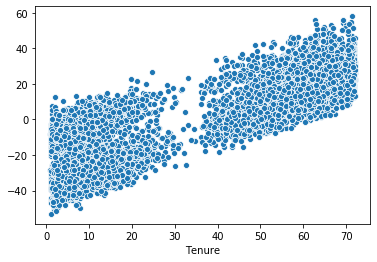

In [36]:
#Residual plot
residuals = y-lm.predict(X)
sns.scatterplot(x=y, y=residuals)
plt.show()